<a href="https://colab.research.google.com/github/pradeepsamm/stocks/blob/main/stock_market_forecasting_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

<ipython-input-2-da7801f817a5>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [ ]:
# Save data to CSV file
data = pd.read_csv('sap_stock.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [ ]:
# Check data types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2550 non-null   object 
 1   Open                   2242 non-null   float64
 2   High                   2543 non-null   float64
 3   Low                    2543 non-null   float64
 4   Close                  2550 non-null   float64
 5   Change                 11 non-null     float64
 6   Traded Volume          2504 non-null   float64
 7   Turnover               2497 non-null   float64
 8   Last Price of the Day  0 non-null      float64
 9   Daily Traded Units     0 non-null      float64
 10  Daily Turnover         7 non-null      float64
dtypes: float64(10), object(1)
memory usage: 219.3+ KB


In [ ]:
# Get descriptive statistics summary of data set
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


In [ ]:
# Display features in data set
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover', 'Last Price of the Day', 'Daily Traded Units',
       'Daily Turnover'],
      dtype='object')

In [ ]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Date','Close'])

In [ ]:
df.head()

,Date,Close
0,2009-03-09,25.59
1,2009-03-10,26.87
2,2009-03-11,26.64
3,2009-03-12,26.18
4,2009-03-13,25.73


In [ ]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   2550 non-null   int64  
 1   Close   2550 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.0 KB


In [ ]:
# Check for missing values in the columns
df.isna().values.any()

False

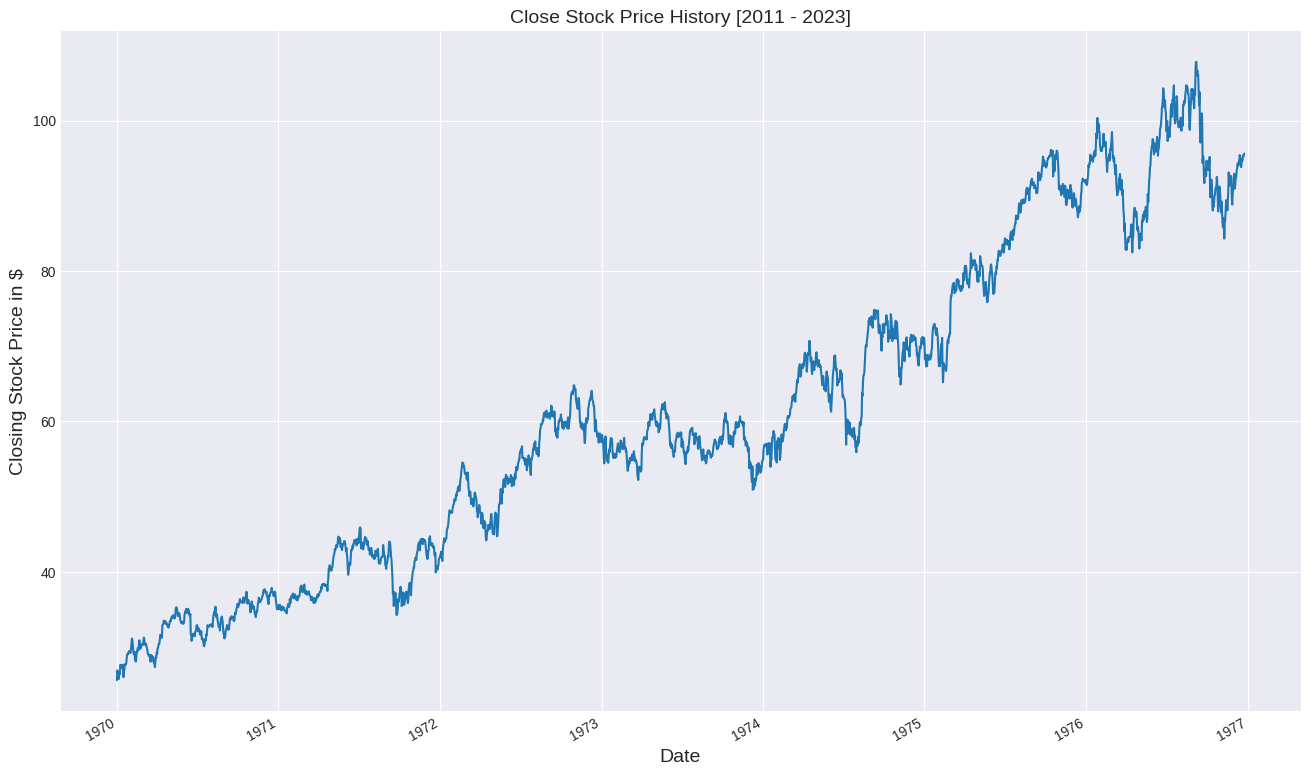

In [ ]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['index'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2011 - 2023]', fontsize=14)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [ ]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

### Create and Train the Model

In [ ]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [ ]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [ ]:
y_train.shape

(2040,)

In [ ]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# The coefficient
print('Slope: ', np.squeeze(model.coef_[0]))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.027614193220502094
Intercept:  25.728679162121914


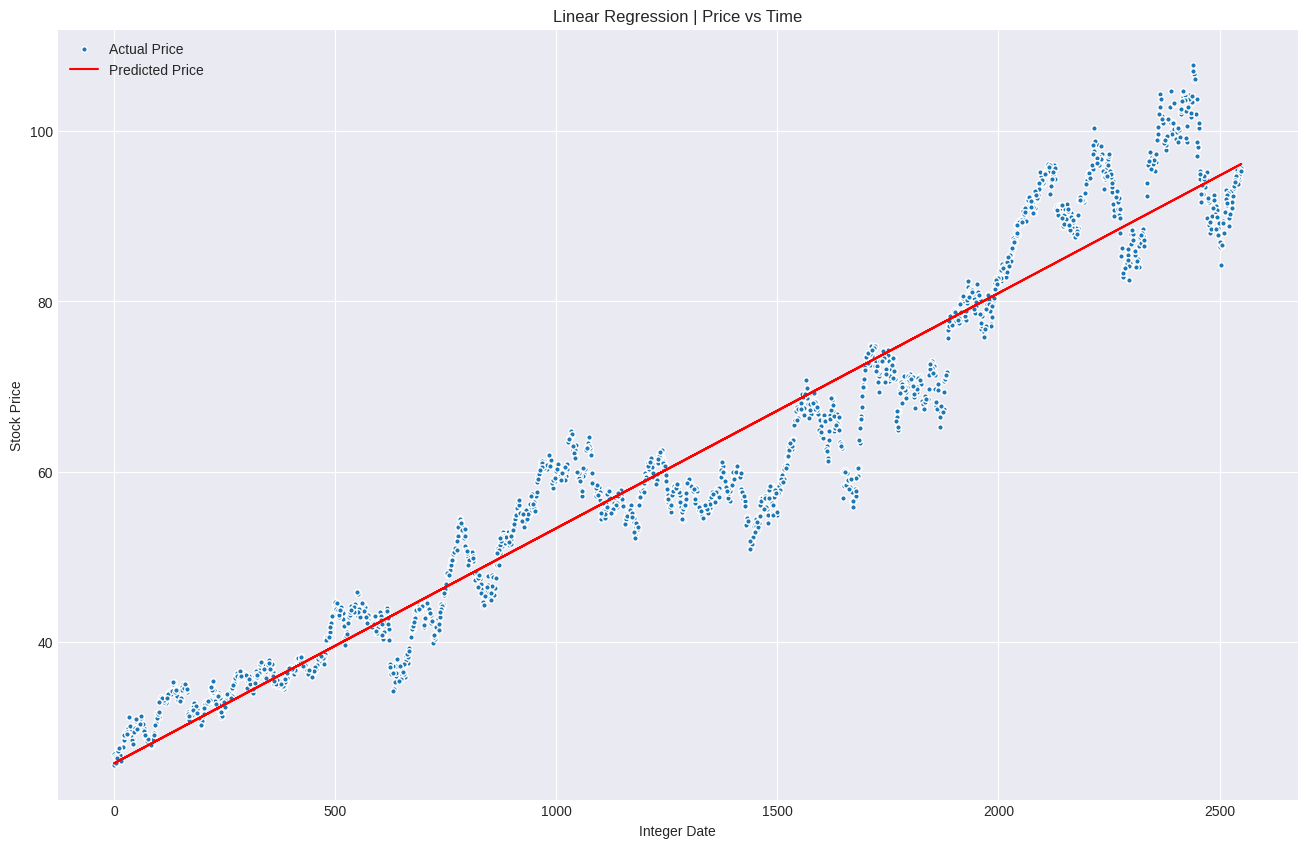

In [ ]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [ ]:
# Generate array with predicted values
y_pred = model.predict(X_test)

In [ ]:
# Get number of rows in data set for random sample
df.shape

(2550, 2)

In [ ]:
# Generate 10 random numbers
randints = np.random.randint(2550, size=10)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [ ]:
df_sample.head()

,Date,Close
252,2010-02-24,32.70
445,2010-11-24,35.84
509,2011-02-24,42.88
554,2011-05-02,43.92
724,2011-12-27,40.75


In [ ]:
sample_pred = model.predict(np.array(df_sample.index).reshape(-1, 1))
df_sample['predication'] = sample_pred

<ipython-input-86-2ff0480291a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['predication'] = sample_pred


In [ ]:
df_sample.head()

,Date,Close,predication
252,2010-02-24,32.70,32.687456
445,2010-11-24,35.84,38.016995
509,2011-02-24,42.88,39.784304
554,2011-05-02,43.92,41.026942
724,2011-12-27,40.75,45.721355


from matplotlib import pyplot as plt
_df_12['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['predication'].plot(kind='hist', bins=20, title='predication')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_14.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='Close', y='predication', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['predication']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('predication', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('predication')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['predication']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'predication'}, axis=1)
              .sort_values('predication', ascending=True))
  xs = counted['predication']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('predication', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('predication')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_20['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['predication'].plot(kind='line', figsize=(8, 4), title='predication')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Close', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='predication', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# display features in data set
df_sample.columns

Index(['Date', 'Close', 'predication'], dtype='object')

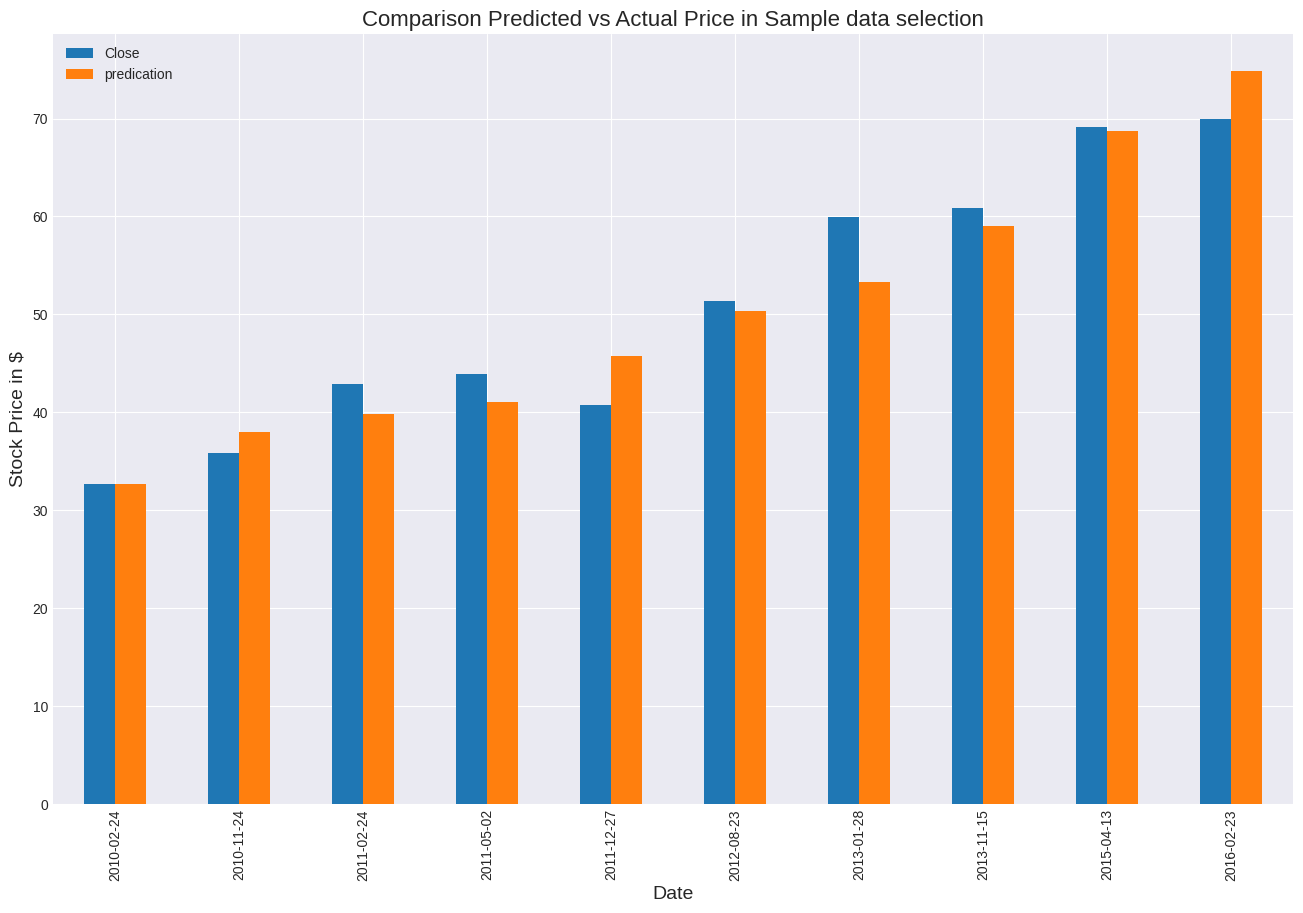

In [ ]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close','predication'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)


# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

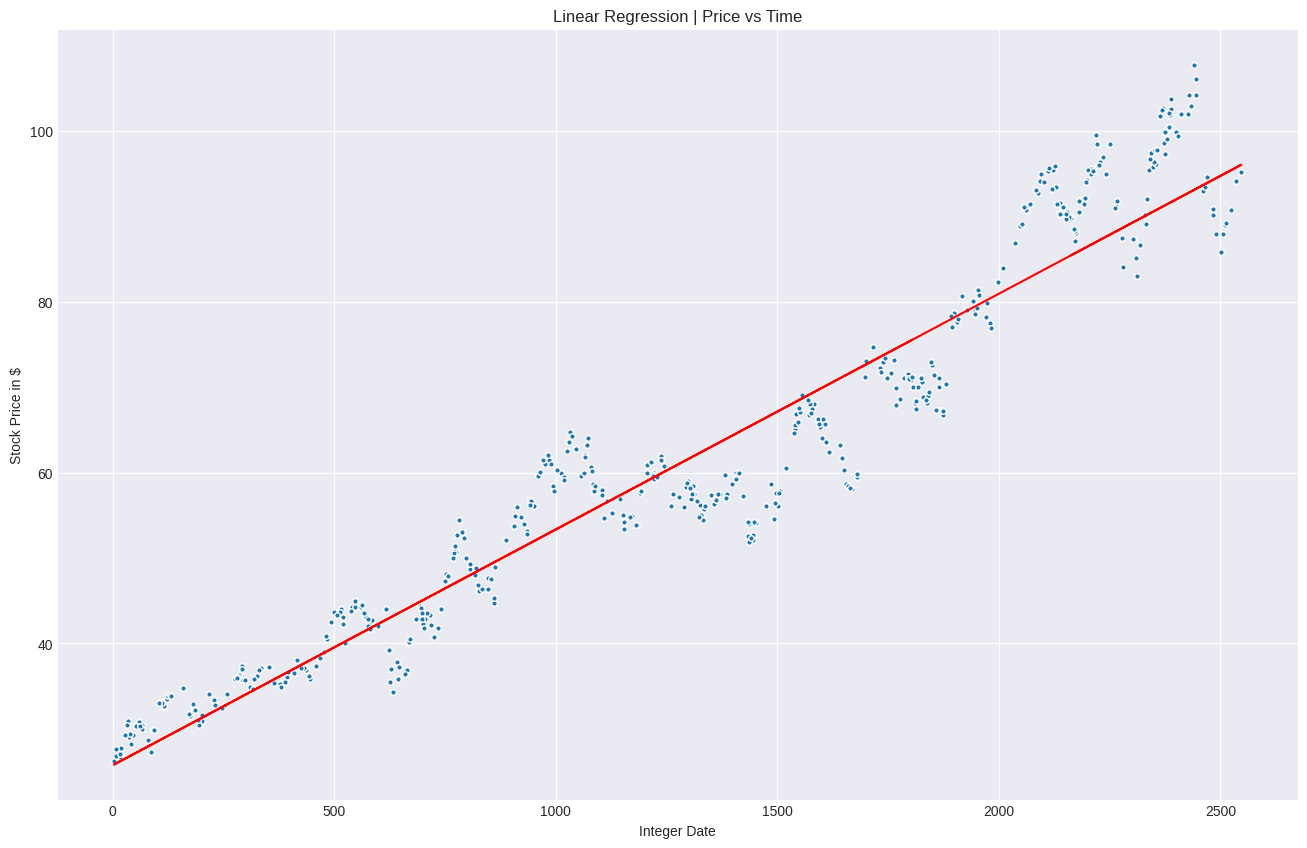

In [ ]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

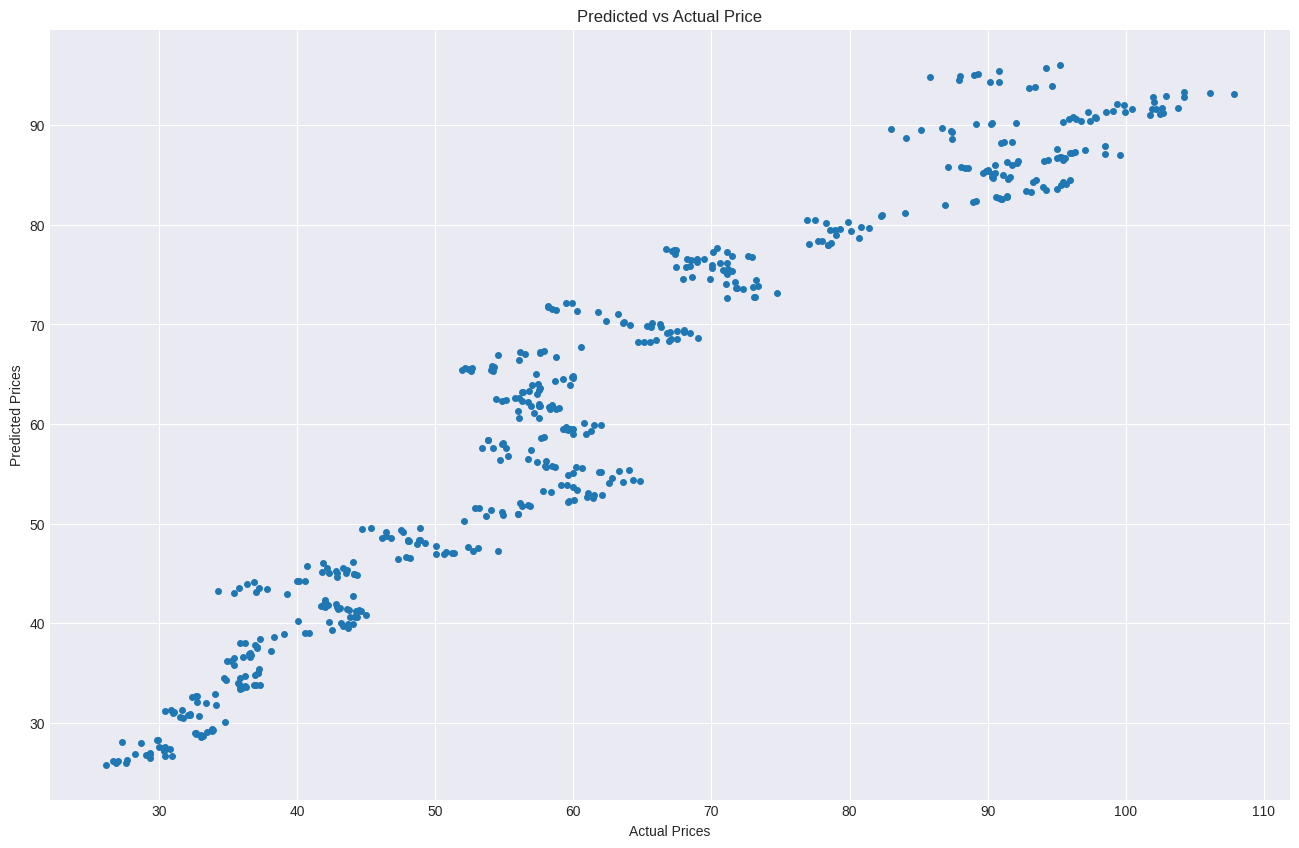

In [ ]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

<ipython-input-98-b15e938120f9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')


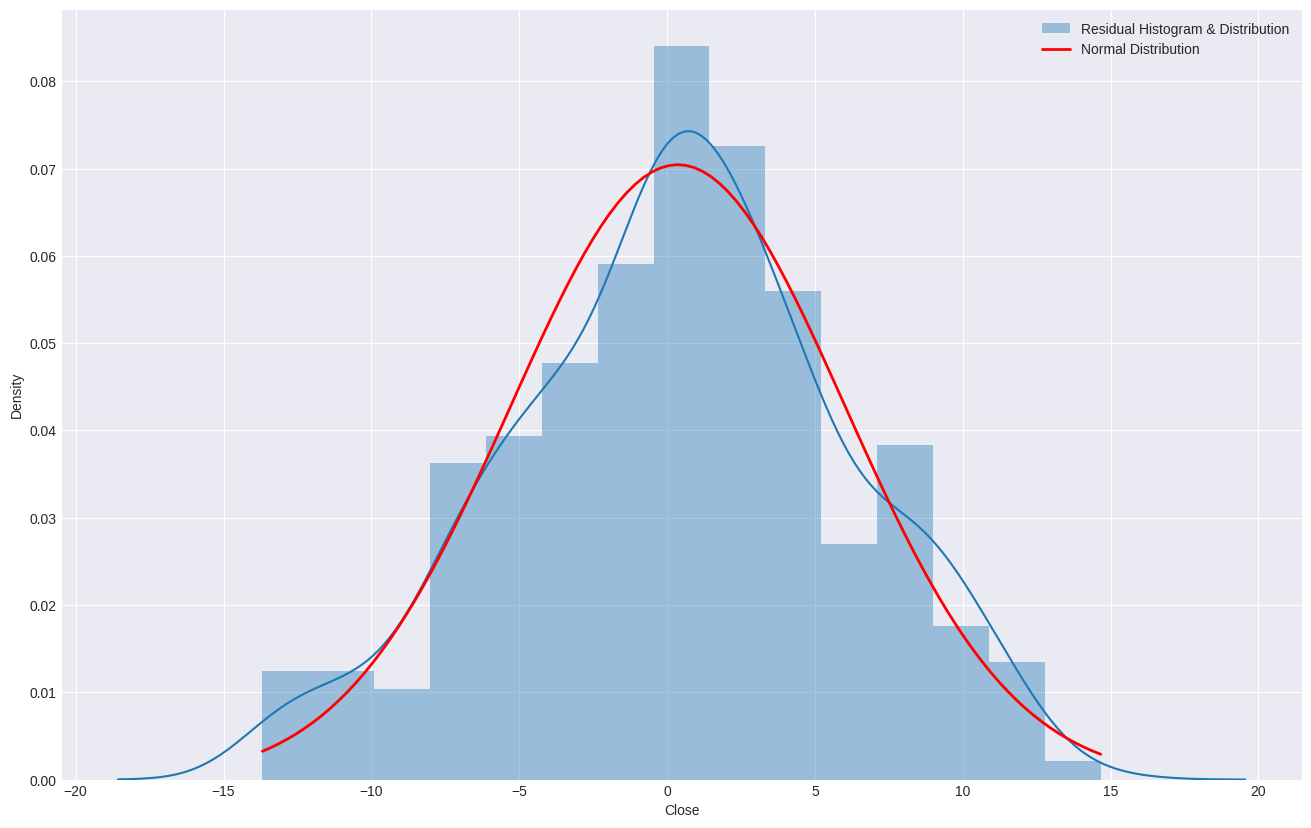

In [ ]:
# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution')

plt.legend()
plt.show()

In [ ]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [ ]:
df.head()

,Date,Close,Prediction
0,2009-03-09,25.59,25.728679
1,2009-03-10,26.87,25.756293
2,2009-03-11,26.64,25.783908
3,2009-03-12,26.18,25.811522
4,2009-03-13,25.73,25.839136


In [ ]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [ ]:
# Statistical summary of test data
df['Close'].describe()

count    2550.000000
mean       60.995955
std        21.097480
min        25.590000
25%        42.950000
50%        58.015000
75%        77.762500
max       107.800000
Name: Close, dtype: float64

In [ ]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.172498876833842
Mean Squared Error: 28.76248048285447
Root Mean Squared Error: 5.3630663321326235


In [ ]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9299612963628697


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9302510400002336